In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import time 
import tensorflow as tf 
from tensorflow import keras

In [2]:
#查看tesorflow版本
print(tf.__version__)

2.3.1


### 一、切分数据

In [3]:
#导入fashion_mnist手写数字数据集
fashion_mnist=keras.datasets.fashion_mnist
#创建训练集和验证集
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
#将训练集进一步拆分成训练集和验证集合
#前5000张作为验证集，5000张之后都作为训练集
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

### 二、对数据做归一化

In [4]:
#归一化,归一化在深度学习中非常重要，可以有效的提高模型的准确率
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#归一化需要是二维矩阵，而这里的x_train,x_valid都是三维的所以需要先reshape（-1,1）,之后再reshape回三维的
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
#查看训练集合，测试集，验证集的数据形状
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


### 三、模型构建

In [6]:
#tf.keras.models.sequential()

#深度神经网络
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))

#循环20次，生成20层的中间层神经元
for _ in range(20):
    model.add(keras.layers.Dense(100,activation='relu'))
    model.add(keras.layers.BatchNormalization()) #增加批归一化，批归一化就是每层神经元都做一次归一化的处理
    
#最后一次的输出层的神经元个数
model.add(keras.layers.Dense(10,activation='softmax'))


#定义激活函数
#relu:y=max(0,x),输入是x，输出是x和0两个数字中较大的一个
#softmax：将向量变成概率分布
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']) 

In [7]:
#查看神经网络有多少层神经网络
model.layers

In [8]:
#查看模型架构
model.summary()
#[None,784]*w+b->[None,300] w.shape [784,300],b=[300]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

### 四、模型训练

In [9]:
#模型训练,添加callback回调函数(Tensorboard,earlystopping,ModelCheckpoint)
logdir='./dnn-callbacks' #创建一个文件路径以及文件名，模型跑出来的结果会保存在项目文件的callbacks中去
import os
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file=os.path.join(logdir,'fashion_mnist_model.h5')
#定义回调函数
callbacks=[
    #使用tensorboard
    keras.callbacks.TensorBoard(logdir),
    #每次跑完模型保存模型
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    #当指标在运行中没有提升，就提前停止训练
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)   #1e-3表示1的e负3次方
]
history=model.fit(
    x_train_scaled,
    y_train,
    epochs=10,
    validation_data=(x_valid_scaled,y_valid),
    callbacks=callbacks)

Epoch 1/10
   1/1719 [..............................] - ETA: 0s - loss: 2.7808 - accuracy: 0.0938WARNING:tensorflow:From C:\Users\xiongyuan\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 20s 12ms/step - loss: 1.0682 - accuracy: 0.6209 - val_loss: 0.6261 - val_accuracy: 0.7758
Epoch 2/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.7541 - accuracy: 0.7345 - val_loss: 0.5406 - val_accuracy: 0.8006
Epoch 3/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.6572 - accuracy: 0.7671 - val_loss: 0.5000 - val_accuracy: 0.8206
Epoch 4/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5947 - accuracy: 0.7890 - val_loss: 0.4916 - val_accuracy: 0.8250
Epoch 5/10
1719/1719 [======================

In [10]:
history.history

{'loss': [1.0682275295257568,
  0.7541311979293823,
  0.6572195887565613,
  0.5947300791740417,
  0.5558900833129883,
  0.5167071223258972,
  0.4900243878364563,
  0.46572232246398926,
  0.4535534381866455,
  0.4343382716178894],
 'accuracy': [0.6209272742271423,
  0.7345272898674011,
  0.767090916633606,
  0.7889999747276306,
  0.8044000267982483,
  0.8177090883255005,
  0.8270545601844788,
  0.8361272811889648,
  0.8413090705871582,
  0.8468000292778015],
 'val_loss': [0.6261320114135742,
  0.5406219959259033,
  0.5000357627868652,
  0.49156278371810913,
  0.4534112215042114,
  0.4185654819011688,
  0.41911327838897705,
  0.3985871374607086,
  0.37709152698516846,
  0.37765589356422424],
 'val_accuracy': [0.7757999897003174,
  0.800599992275238,
  0.8205999732017517,
  0.824999988079071,
  0.8429999947547913,
  0.8501999974250793,
  0.8460000157356262,
  0.8551999926567078,
  0.8669999837875366,
  0.8654000163078308]}

### 五、查看模型效果

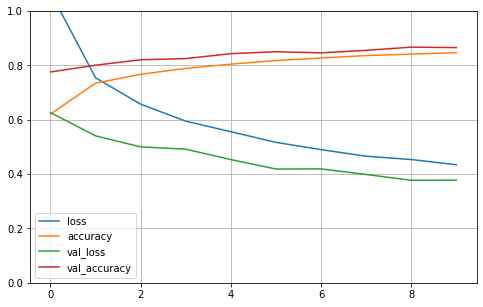

In [15]:
#绘图，也可以不绘图，直接用tensorboard打开查看结果
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)
#可以看出损失函数在不断的下降，准确率在不断的提升

In [12]:
#可以在测试集上进一步评估模型结果
model.evaluate(x_test_scaled,y_test)
#可以看到结果中测试集上loss是0.44,准确率是0.84

313/313 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8536


[0.4185832440853119, 0.853600025177002]

### 五、读取callback的结果

In [13]:
#1--打开anaconda的powershell
#2--cd到项目文件夹中去
#3--输入命令：tensorboard --logdir=callbacks #注意callbacks是文件名，是自己之前回调函数中创建的

### **六、梯度消失**

In [14]:
#梯度消失的原因
#1--出现在深度神经网络中
#2--参数众多，训练不充分
#3--梯度消失-->链式法则-->复合函数（类似f(q(x))）